# `geopandas`

Geopandas is a Python Library that extends `pandas` by adding support for geospatial data.

## Reproducible file paths

- Basically Vector data

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt


To import data we first use `os` package to create a reproducible file path:


In [2]:
fp = os.path.join('data','gbif_sus_scrofa_california','gbif_sus_scrofa_california.shp')
fp

'data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

In [3]:
pigs = gpd.read_file(fp)

pigs.head()


,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [4]:
fp = os.path.join('data','ca_state_boundary','ca_state_boundary.shp')
ca_boundary = gpd.read_file(fp)
ca_boundary

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## `GeoSeries` and `GeoDataFrame`

`geopandas.GeoDataFrame` = core structure in geopandas = `pandas.DataFrame` plus a dedicated geometry column that can perform spatial operations.

**Geometry Column** holds the geometry (points, polygon, etc) of each spatial feature. The type of this columns `geopandas.Series`.

In [5]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [6]:
# Check the data type of the datatypes
print(type(pigs))
# Check the data type of the geometry column
print(type(pigs.geometry))
# Check the data type of the gbifID column
print(type(pigs.gbifID))
# Check the data type of each column
pigs.dtypes

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [7]:
# Check type of each element in the geometry column
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

What is the geometry type of the single feature in the CA state boundary?

In [8]:
ca_boundary.geom_type

0    MultiPolygon
dtype: object

# CRS
**coordinate reference system (CRS)** = instructions to locate each spatial feature of our data frame on the surface of the Earth. We access the CRS of a geopandas.GeoDataFrame using the crs attribute:

In [9]:
# Access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Cannot be both Geographic and Projected!

In [10]:
# Examine CRS details
print('Ellipsoid: ', pigs.crs.ellipsoid)
print('Datum: ', pigs.crs.datum)
print('Is geographic?: ', pigs.crs.is_geographic)
print('Is projected?: ', pigs.crs.is_projected)

Ellipsoid:  WGS 84
Datum:  World Geodetic System 1984 ensemble
Is geographic?:  True
Is projected?:  False


### Extent
encoded as `(minx,miny,maxx, maxy)`

In [11]:
# Obtain the geographic extent of the geo-dataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [12]:
# Examine CRS and Extent of CA Boundary
print('CRS:', ca_boundary.crs, '\n')
print(ca_boundary.total_bounds)

CRS: EPSG:4326 

[-124.48201686   32.52883674 -114.13122248   42.00950827]


In [13]:
pigs.crs == ca_boundary.crs

True

## Data wrangling

You can use all your `pandas` data wrangling to wrangle `geopandas.geoDataFrame`

In [14]:
# Viewing data and sorting from smallest to largest
pigs['year'].value_counts().sort_index()

year
1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: count, Length: 61, dtype: int64

In [15]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs['year'] >=2020]

# Check length of original dataframe
print('Total number of observation:', len(pigs))

# Check length of new dataframe
print('Number of observations since 2020:', len(pigs_recent))

Total number of observation: 1046
Number of observations since 2020: 606


## Create a map (Preliminary)
`gpd.DataFrame` has a `plot()` method that quickly creates a map of our data using the geospatial information

<Axes: >

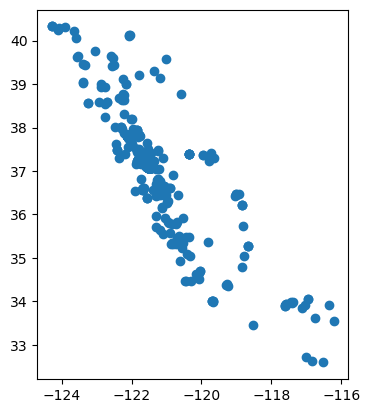

In [16]:
pigs_recent.plot()

## `Matplotlib`

We can interact with `matplotlib` via its `pylot` interface.

Matplotlib graphs the data in a **figure** that can have one or more **axes**. 
The aces is *only* the area specified by the x-axis and the y-axis what is plotted in. A figure can include multiple axes in it. 

To Create A Figure:

NameError: name 'df' is not defined

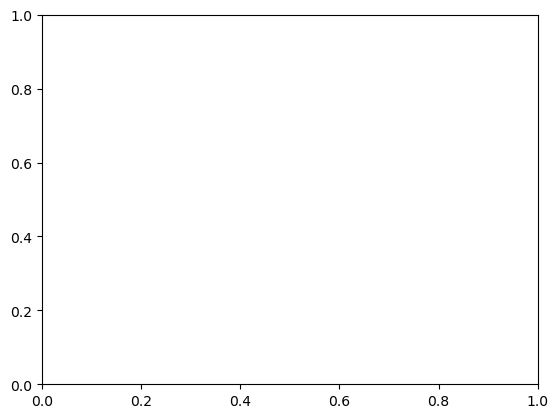

In [23]:
# Initialize empty figure and axis
fig, ax = plt.subplots()

# Plot df on the ax axis
df.plot(ax=ax)  # Add plot to axis

            # Other arguments for plot function

# Display figure
plt.show()

## Adding a layer

When using `maplotlib` it can be useful to think of creating a plot as adding layers on an axis.

Ex:

The first layer we want to add to our data axis is the `pigs_recent` point data

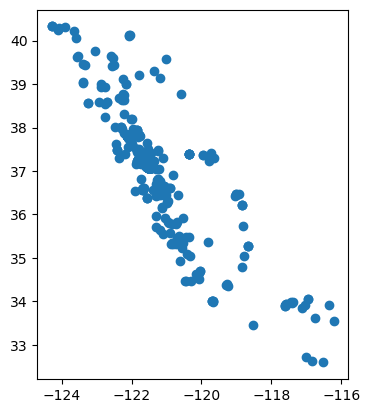

In [19]:
# Initialize empyt figure and axis
fig, ax = plt.subplots()

# Add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax)

# Display figure
plt.show()

## Customization

Some customization can be done directly in `plot()` method for the dataframe. Some other is done by updating attributes of the axis `ax`



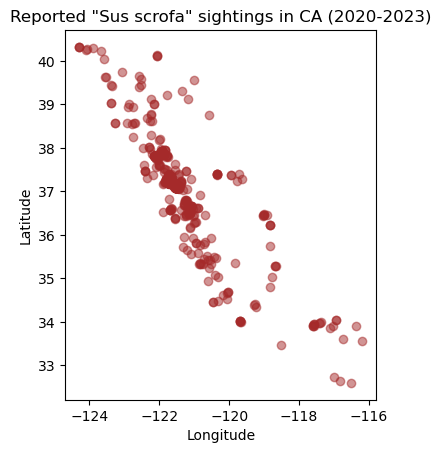

In [24]:
# Initialize empyt figure and axis
fig, ax = plt.subplots()

# Add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax,
                 alpha = 0.5, # Transparency
                 color = 'brown' # Update the color
                 )

# Update Axis
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display figure
plt.show()

## Check-in
Add the California state boundary to the plot so the boundary appears behind the points as below. Don’t forget to customize your graph!

Write a short caption for your map describing the spatial distribution of observations. What patterns or clusters do you notice?

Discuss with a partner: what are some possible biases or limitations in GBIF species occurrence data (e.g., spatial coverage, sampling effort, data quality)?

In [30]:
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


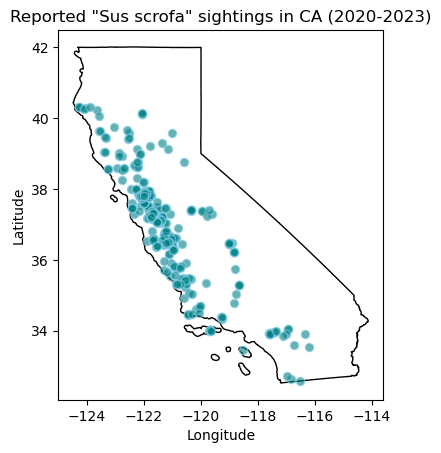

In [48]:
# Initialize empyt figure and axis
fig, ax = plt.subplots()

# Adding CA Boundary
ca_boundary.plot(ax=ax,
                 color = 'none', # removes fill
                 edgecolor = "black" # outline color
                 )

# Add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax,
                 alpha = 0.6, # Transparency
                 color = 'teal', # Update the color
                 edgecolor = "skyblue"
                 )

# Update Axis
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display figure
plt.show()

In this plot, we can see that wild pigs are commonly seen throughout the coast of california. There is a higher human population along the coast and less along the valley.